
<img src="tpan1.png">



*****

## Exercice 1:<h2>
>On considère le polynôme $p(x) = (x - 1)^6$. 
>
>En développant on
>peut écrire ce même polynôme sous la forme
>$f(x) = x^6 - 6x^5 + 15x^4 - 20x^3 + 15x^2 - 6x + 1.$
>
>1) Avec Matlab évaluer $p(x)$ et $f(x)$ pour $x$ allant de $.998$ à
>$1.002$ en choisissant des pas de $.0001$.
>
>2) Faire un graphique de $f(x)$ et $p(x)$. Commenter.

### Solution de l'exercice 1 avec MATLAB/OCTAVE
Executer ce code 
* Soit en basculant sous le noyaux octave
* [ocave-online.net][www.https://octave-online.net/]

In [1]:
def horner(a,z_0):
    n = len(a)
    result = a[1]
    for j in (2,n-1):
       
        result = result*z_0 + a[j]
    
    return result



In [2]:
import numpy as np
def p(x): return np.power(x-1,6) 
def f(x): return np.power(x,6) - 6*np.power(x,5) + 15*np.power(x,4) - 20*np.power(x,3) + 15*np.power(x,2) - 6*x + 1 

In [3]:
T = [1,-6,15,20,15,-6,1]
#Expression Réduite
print('--------p(i)------------')
i = 0.998
while (i<=1.002):
    print(p(i))
    i+=0.001
    
#Expression Developpée
print('----------f(i)----------')
i=0.998
while  (i<=1.002):
    print(f(i))
    i+=0.001
    
print('-----------horner--------')
i=0.998
while (i<=1.002):
    print(horner(T,i))
    i+=0.001

--------p(i)------------
6.400000000000034e-17
1.0000000000000053e-18
0.0
9.999999999993393e-19
6.399999999995771e-17
----------f(i)----------
1.7763568394002505e-15
0.0
0.0
-2.6645352591003757e-15
1.7763568394002505e-15
-----------horner--------
9.993976
9.996994
10.0
10.002994
10.005975999999999


### Voici le résultat ( MATLAB OCTAVE)

<img src="sol1.png">

#### 2) 

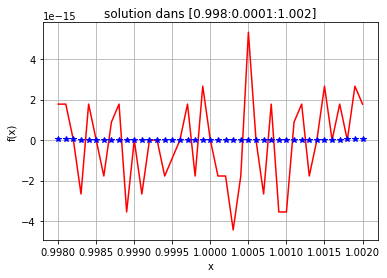

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
x = []
y = []
z=[]
i = 0.998
while(i<=1.002):
    x.append(i)
    y.append(f(i))
    z.append(p(i))
    i += 0.0001
    
plt.plot(x,y, 'r',x,z, 'b*')
plt.title ("solution dans [0.998:0.0001:1.002]")
plt.xlabel ("x")
plt.ylabel ("f(x)")
plt.grid (True)
plt.show()

### Résultat ( MATLAB/OCTAVE)
<img src="sol12.png">

## Expliquer ces sources d'erreurs !!!!

# EXERCICE 2:

>On considère l'équation : $$ f(x)=x^3+x^2-3x-3=0$$
>1) Dessiner la courbe de $f$ dans l'intervalle $[-2;2]$, puis trouver des intervalles convenables pour appliquer la méthode de >bisection.
>
>2) Utiliser un programme `dicho.m` qui permettra de trouver les solutions de l'équation $f(x)=0$ avec $eps=0.001$.
>
>3) Modifier le programme `dicho.m` pour qu'il donne le nombre d'itération nécessaire pour avoir la solution à $eps$ près.

### Modèle MATLAB \OCTAVE
## 2.1
version MATLAB 1
``` octave 
f=@(x) x.^3+x.^2-3*x-3
```
version MATLAB 2 qui sera enregistré sous le nom `f.m`
``` octave 
function [y]=f(x)
y=x.^3+x.^2-3*x-3
end
```
VERSION 1 PYTHON
``` python
def f(x):
    return x**3+x**2-3*x-3
``` 
version 2 PYTHON
``` python
f= lambda x:x**3+x**2-3*x-3
``` 

## Version Python

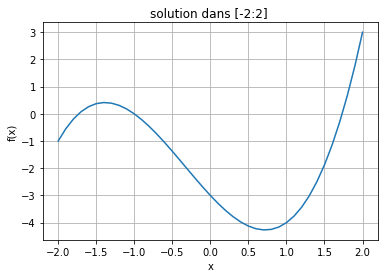

In [7]:
import matplotlib.pyplot as plt
from numpy import linspace
f=lambda x: x**3+x**2-3*x-3
T=linspace(-2,2,41)
plt.title("solution dans [-2:2] ");
plt.xlabel("x")
plt.ylabel ("f(x)")
plt.grid(True)
plt.plot(T,f(T))


# Daprés le graph de $f$ il existe 3 solutions :
- $\alpha_1 \in ]-2;-1.5[$ 
- $\alpha_2 \in ]-1.5;-0.5[$ 
- $\alpha_3 \in ]1.5;2[$ 

### 2.2 Version OCTAVE
voiçi une implementation en matlab dela fonction dicho
```octave
function [x]=dicho(f,a,b,tol)
m=(a+b)/2;
err=abs(b-a);
while err>tol 
    if f(m)==0 
        break
    end
    if f(a)*f(m)<0 
        b=m;
    else a=m;
    end
    m=(a+b)/2;
    err=abs(b-a);
end
x=m;
end
```

`[x]=dicho(f,-2,-1.5,0.001)`

`[x]=diho(f,-2,-1.5,0.001)`

`[x]=dicho(f,-2,-1.5,0.001)`

### Donner la version python de `dicho`

In [38]:
def dicho(a,b,f,n):
    '''version itérative '''
    m = (a+b)/2
    err = abs(b-a)
    while (err>n):
        if f(m)==0:break
        if f(a) * f(m) <= 0: 
            b=m
        else:
            a=m
        m=(a+b)/2
        err=abs(b-a)
    
    return m

    

In [39]:
x3=dicho(-1,2,f,10)
x10=dicho(-2,-1.5,f,10)
x20=dicho(-2,-1.5,f,20)
print(x3,x10,x20)
#print(x3)

0.5 -1.75 -1.75


In [12]:
print('f(x10)={},f(x20)={}'.format(f(x10),f(x20)))

f(x10)=432.510009765625,f(x20)=432.510009765625


In [61]:
def dichow(a,b,f,eps):
    """version tant que qui renvoi la solution avec le nombre d'''itération """
    c , d = min (a , b ) , max (a , b )
    valc , vald = f ( c ) , f ( d )
    n = 0
    while d - c > eps :
        n += 1
        m = ( c + d ) / 2
        valm = f ( m )
        if valc * valm < 0 :
            d = m
            vald = valm
        else :
            c = m
            valc = valm
    print (" Le nombre d'itérations est :", n )
    print ("Valeur approchée est",( c + d ) / 2)
    return n
    

- $\alpha_1 \in ]-2;-1.5[$ 
- $\alpha_2 \in ]-1.5;-0.5[$ 
- $\alpha_3 \in ]1.5;2[$ 

In [62]:
dichow(-2,-1.5,f,0.0001)

 Le nombre d'itérations est : 13
Valeur approchée est -1.500030517578125


13

In [ ]:
## 3 (OCTAVE MATLAB)

In [ ]:
f=@(x) x.^3+x.^2-3*x-3
t=linspace(1.7,1.75,100);
subplot(2,2,1)
plot(t,f(t),'r')
grid on
##########################################
t=linspace(1.2,1.4,100);
subplot(2,2,2)
plot(t,f(t),'r')
grid on
##########################################
t=linspace(1.35,1.4,100);
subplot(2,2,3)
plot(t,f(t),'r')
grid on
#########################################
t=linspace(1.365,1.367,100);
subplot(2,2,4)
plot(t,f(t),'r')
grid on



## PYTHON

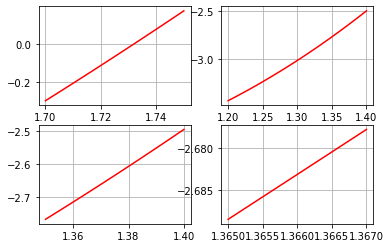

In [16]:
import matplotlib.pyplot as plt
from numpy import linspace
f=lambda x: x**3+x**2-3*x-3
t = linspace(1.7,1.75,100);
plt.subplot(2,2,1)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t = linspace(1.2,1.4,100);
plt.subplot(2,2,2)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t = linspace(1.35,1.4,100);
plt.subplot(2,2,3)
plt.plot(t,f(t),'r')
plt.grid(True)
#########################################
t=linspace(1.365,1.367,100);
plt.subplot(2,2,4)
plt.plot(t,f(t),'r')
plt.grid(True)


In [16]:
import numpy as np
np.floor(2.3)
np.ceil(2.3)

3.0

In [17]:
import numpy as np
a=-1.5
b=-0.5
p=8 # précision à 10 ^-8 prés
dichow(a,b,f,10**(-p))
#à 10^-8


 Le nombre d'itérations est : 27


-0.5000000037252903

In [18]:
interval=[[-2,-1.5],[-1.5,-0.5],[1.5,2]]
for u in interval:
    print(dichow(u[0],u[1],f,10**(-3)))
################################################   
print(dichow(-2,-1.5,f,10**(-3)))
print(dichow(-1.5,-0.5,f,10**(-3)))
print(dichow(1.5,2,f,10**(-3)))


 Le nombre d'itérations est : 9
-1.50048828125
 Le nombre d'itérations est : 10
-0.50048828125
 Le nombre d'itérations est : 9
1.99951171875
 Le nombre d'itérations est : 9
-1.50048828125
 Le nombre d'itérations est : 10
-0.50048828125
 Le nombre d'itérations est : 9
1.99951171875


Le nombre d'itération N nécéssaire à la méthode de la dichotomie pour trouver $\alpha$ à $10^{-p}$ prés 

$$N \geq E\left(\dfrac{\ln(b-a)+p\ln(10)}{\ln(2)}\right)+1$$

## Fonction qui renvoie le nombre d'itérations

In [51]:

## Ecrire une fonction qui permet de renvoyer le nombre d'itération nécessaire à la méthode de dichotomie pour calculer
## la solution à 10^-p près
#ND=lambda p:...............

ND = lambda a,b,p: int ((np.log(b-a) + p*np.log(10))/np.log(2)) + 1
    



In [52]:
a=-3
b=-1.5
ND(a,b,5)

18

In [53]:
#alpha 1
dichow(-2,-1.5,f,10**(-5))
#à 10^-8

 Le nombre d'itérations est : 16


-1.5000038146972656

In [54]:
#alpha 2
dichow(-1.51,-0.5,f,10**(-5))
#à 10^-8

 Le nombre d'itérations est : 17


-0.5000038528442383

## Méthode graphique pour la recherche de la solution 

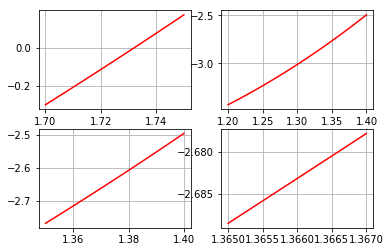

In [39]:
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
import numpy as np 
import matplotlib.pyplot as plt

f=lambda x:x**3+x**2-3*x-3

t=np.linspace(1.7,1.75,100)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=np.linspace(1.2,1.4,100)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=np.linspace(1.35,1.4,100)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r')
plt.grid(True)
#########################################
t=np.linspace(1.365,1.367,100)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r')
plt.grid(True)


## Transformer le code précédent pour trouver desvaleurs approchées des solutions $\alpha_1$, $\alpha_2$ et $\alpha_3$ de l'equation (E)

In [65]:
def ValApproch(a,b,f,eps,n):
    x=a+b/2
    while(n>0):
        if(f(a)*f(b)<0):
            b=x
        if(f(b)*f(x)<0):
            a=b
            b=x
        n = n-1
    return (a+b)/2

In [68]:
#𝛼1∈]−2;−1.5[ 
a=-2
b=-1.5
eps=0.0001
n = dichow(a,b,f,eps)
print(ValApproch(a,b,f,eps,n))
#𝛼2∈]−1.5;−0.5[
a=-1.5
b=-0.5
eps=0.0001
n = dichow(a,b,f,eps)
print(ValApproch(a,b,f,eps,n))
#𝛼3∈]1.5;2[
a=1.5
b=2
eps=0.0001
n = dichow(a,b,f,eps)
print(ValApproch(a,b,f,eps,n))

 Le nombre d'itérations est : 13
Valeur approchée est -1.500030517578125
-1.75
 Le nombre d'itérations est : 14
Valeur approchée est -0.500030517578125
-1.0
 Le nombre d'itérations est : 13
Valeur approchée est 1.999969482421875
1.75


# EXERCICE 3:
>On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$
>1) Dessiner la courbe de $f$ dans l'intervalle $[1;2]$, puis trouver une valeur approché de la solution à 0.001 près (En >utilisant la fonction zoom du graphique).
>
>2) Vérifier que cette équation est équivalente aux 3 schéma du point fixe suivant:
>
>a) $g_1(x)=\frac{1}{2}\sqrt{10-x^3}=x$.
>
>b) $g_2(x)=\sqrt{\displaystyle\frac{10}{4+x}}=x$.
>
>c) $g_3(x)=x-x^3-4x^2+10=x$.
>
>3) Ecrire puis appliquer  une fonction Matlab que l'on appellera  `pointfixe.m` aux trois schémas précédents en prenant >`x0=1.5;eps=0.001`.
>
>4) Quelle est la fonction (parmi $g_1, g_2$ et $g_3$) qui donne la convergence la plus rapide?
>

### Correction <h3>
    

#### 1)<h4>

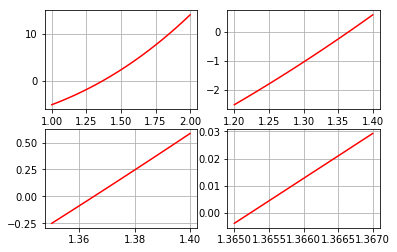

In [40]:
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
import numpy as np 
import matplotlib.pyplot as plt

f=lambda x:x**3+4*x**2-10

t=np.linspace(1,2,100)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=np.linspace(1.2,1.4,100)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=np.linspace(1.35,1.4,100)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r')
plt.grid(True)
#########################################
t=np.linspace(1.365,1.367,100)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r')
plt.grid(True)


#### 2) Justification théorique pour la fonction g1

On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$

a) $g(x)=\frac{1}{2}\sqrt{10-x^3}=x$.

 $$x^3+4x^2-10=0$$ 
    
 $$4x^2=10-x^3$$
 
 $$2x=\sqrt{10-x^3}$$
 
 $$x=\frac{1}{2}\sqrt{10-x^3}$$
 
Donc $ f(x)=g(x)$

## Calcul symbolique de la dérivée

In [46]:
from sympy import *
import numpy as np
x, y, z = symbols('x y z')
init_printing(use_unicode=True)
g1=lambda x: 1/2*sqrt(10-x**3)


In [76]:
dg1=lambdify(x,diff(g1(x),x,1))
dg1(1.365)

### Que pouvez vous conclure à propos des convergences de g1

In [ ]:
|dg1|<1 alors la fonction de g1 converge localement


## Justification théoriques pour g2 et g3

On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$

b) $g(x)=\sqrt{\displaystyle\frac{10}{4+x}}=x$.

$$x^3+4x^2-10=0$$
$$x^3+4x^2=10$$
$$x^2(x+4)=10$$
$$x^2=\frac{10}{x+4}$$
$$x=\sqrt{\displaystyle\frac{10}{4+x}}$$
Donc $ f(x)=g(x)$

On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$
c) $g(x)=x-x^3-4x^2+10=x$.

$$x^3+4x^2-10=0$$
$$x^3+4x^2-10+x-x=0$$
$$x^3-4x^2+x-x=10$$
$$x^3-4x^2+x=x+10$$
$$4x^2+x=x-x^3+10$$
$$x=x-x^3-4x^2+10$$
Donc $ f(x)=g(x)$

## Etudier théoriquement la convergences de g2 et g3

$$g2'(x)=$$
$$abs(g2'(x))= abs \displaystyle\frac{-10\sqrt{4+x}}{8\sqrt{10x}+4\sqrt{10}}$$
$$abs(g2'(x))<1$$
Donc la fonction g2 converge

$$g3'(x)= 1-3x^2-6x$$
$$abs(g3'(x))= abs(1-3x^2-6x)$$
$$abs(g3'(x))>1$$
Donc la fonction g3 diverge
        

### Méthode numérique avec MATLAB/OCTAVE

In [1]:
f=@(x) x.^3+4*x.^2-10 # la fonction f
g1=@(x) 1/2*sqrt(10-x.^3)
g2=@(x) sqrt(10./(x+4))
g3=@(x) x-x.^3-4*x.^2 + 10

function [zero,erreur,niter]=pointfixe(g,x0,eps,nmax)
zero=x0;
for niter=1:nmax
    x=zero; % 
    zero=g(x);	% 
    erreur=abs(zero-x);
    if erreur<eps 
        return
    end
end
disp('pas de convergence avec le nombre d''iteration indique')
end

f =

@(x) x .^ 3 + 4 * x .^ 2 - 10

g1 =

@(x) 1 / 2 * sqrt (10 - x .^ 3)

g2 =

@(x) sqrt (10 ./ (x + 4))

g3 =

@(x) x - x .^ 3 - 4 * x .^ 2 + 10



In [3]:
[x,erreur,niter]=pointfixe(g1,1.5,0.001,50)

x =  1.3654
erreur =  0.00053184
niter =  10


In [4]:
[x,erreur,niter]=pointfixe(g2,1.5,0.001,50)

x =  1.3653
erreur =  0.00030773
niter =  4


In [2]:
[x,erreur,niter]=pointfixe(g3,1.5,0.001,50)

pas de convergence avec le nombre d'iteration indique
x =  NaN
erreur =  NaN
niter =  50


#### 4)<h4>

### Donner la solution avec un codepython 


In [ ]:
import numpy as np
f=lambda  x: x**3+4*x**2-10 # la fonction f
g1=lambda x: 1/2*np.sqrt(10-np.power(x,3))
g2=lambda x: np.sqrt(10/(x+4))
g3=lambda x: x-np.power(x,3)-4*np.power(x,2) + 10


def ptfixe(g,x0,eps,nmax):
    zero=x0;
    for inter in range(1,nmax):
        x=zero
        zero=g(x)
        erreur=abs(zero-x)
        if erreur<eps:
            return (x,erreur,inter)
    print('pas de convergence avec le nombre d''iteration indique')



ptfixe(g3,1,0.0001,10)

### quelle est la fonction qui donne la convergence la plus rapide ??

Donner le nombre d'itération pour chaque méthode convergent e
+ $g_2$ donne le resultat en ? itérations 
+ $g_1$ donne le resultat en ?
+ $g_3$ est - elle convergente?

In [ ]:
g1 donne le resultat en 16 itérations

In [ ]:
g2 donne le resultat en 6 itérations

In [ ]:
g3 divergente

La fonction g2 qui donne la convergence la plus rapide puisque il a le nombre d'itérations le plus petit.

# EXERCICE 4:
>1) On considère la fonction $f(x)=e^{-x}-x$. Ecrire puis appliquer  une fonction Matlab que l'on appellera `newton.m` à la >fonction $f$, en prenant $x0=0$, $eps=0.001$ .
>
>2) Montrer que l'équation $f(x)=0$ admet une solution unique que l'on peut obtenir en utilisant la méthode de Newton à partir >de $x0=1$.

### Correction MATLAB 

#### 1) <h4>

function sol=newtonn(a,eps)
x1=a;
x2=x1-f(x1)/fprime(x1);

while abs(x1-x2)>eps
     x1=x2;
     x2=x1-f(x1)/fprime(x1);
end
sol=x2;

f=@(x) exp(-x)-x
fprime=@(x) -exp(-x)-1
t=linspace(0,1,100);
plot(t,f(t))
grid on

sol=newtonn(0,0.001)

#### 2) <h4>

In [ ]:
sol=newton(1,0.001)

### Solution Python

## Donner la solution entière avec un code python

In [33]:
def newtonn(a,eps):
    x1=a
    x2=x1-f(x1)/fprime(x1)
    while abs(x1-x2) > eps:
        x1=x2
        x2=x1-f(x1)/fprime(x1)
    return x2


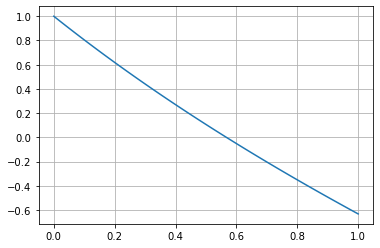

In [34]:
import numpy as np
import matplotlib.pyplot as plt
f= lambda x: np.exp(-x) - x
fprime= lambda x: -np.exp (x) - 1 
t=np.linspace(0,1,100);
plt.plot(t,f(t))
plt.grid (True)

In [35]:
 newtonn(1,0.001)

0.5676776889296505